<a href="https://colab.research.google.com/github/adityav1810/Semester_5_Labs/blob/master/ECSE341L-ImageProcessing/LAB5/Lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [35]:
import numpy as np
import matplotlib.pyplot as plt

import cv2
from google.colab.patches import cv2_imshow

import matplotlib.pyplot as plt
import math
from skimage import data
from skimage import img_as_float

import random
from skimage import io
from skimage import transform as tf


In [21]:
img_path='/content/drive/My Drive/BTECH SEM 5/Image&VideoProcessing/LAB4/8bitimg.jpg'

In [22]:
img=cv2.imread(img_path)

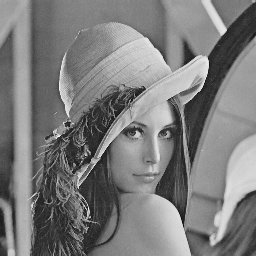

In [23]:
cv2_imshow(img)

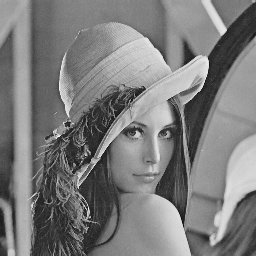

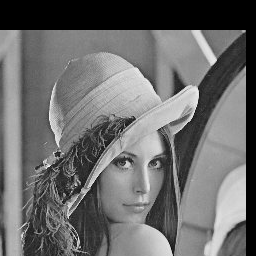

In [24]:

height, width = img.shape[:2]   
n_height, n_width = 30, -10  
T = np.float32([[1, 0, n_width], [0, 1, n_height]])   
img_translation = cv2.warpAffine(img, T, (width, height)) 
cv2_imshow(img) 
cv2_imshow(img_translation) 
cv2.waitKey() 
  
cv2.destroyAllWindows()

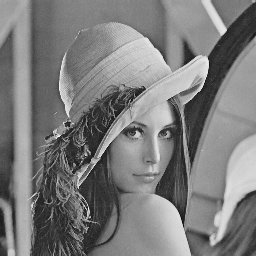

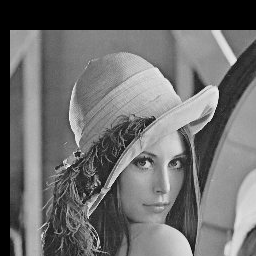

In [25]:
height, width = img.shape[:2] 
  
n_height, n_width = 30, 10
  
T = np.float32([[1, 0, n_width], [0, 1, n_height]]) 
   
img_translation = cv2.warpAffine(img, T, (width, height)) 
  
cv2_imshow(img) 
cv2_imshow(img_translation) 
cv2.waitKey() 
  
cv2.destroyAllWindows()

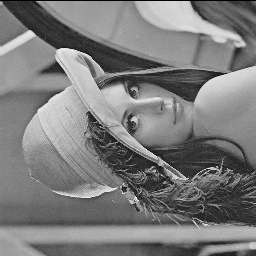

In [29]:

rows,cols = img.shape[:2]
#scaling
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
#translation
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
#rotation
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))

cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

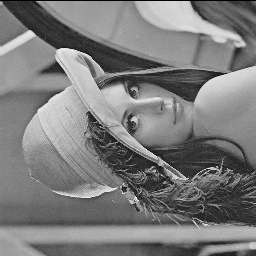

In [30]:
#scaling
height, width = img.shape[:2]
res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

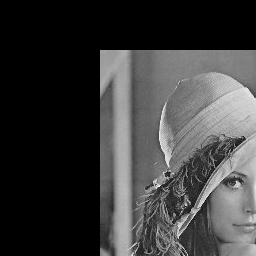

In [31]:
M= np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

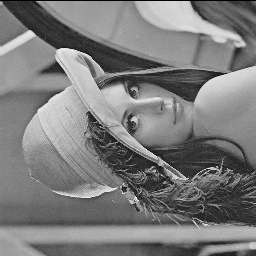

In [32]:
M = cv2.getRotationMatrix2D((cols/2,rows/2),90,1)
dst = cv2.warpAffine(img,M,(cols,rows))
cv2_imshow(dst)
cv2.waitKey(0)
cv2.destroyAllWindows()

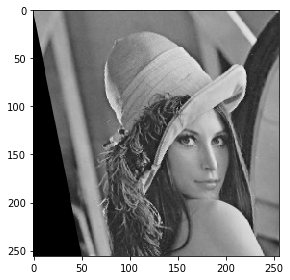

In [33]:
afine_tf = tf.AffineTransform(shear=0.2)
modified = tf.warp(img, inverse_map=afine_tf)
io.imshow(modified)
io.show()

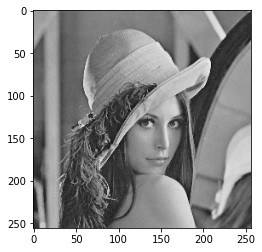

In [34]:
v = 3

tf = transform.AffineTransform(shear=-v)
plt.imshow(np.hstack([img]))
plt.show()

In [37]:
def sp_noise(image,prob):
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

image = cv2.imread(img_path,0) # Only for grayscale image
noise_img = sp_noise(image,0.05)
cv2.imwrite('sp_noise.png', noise_img)

True

In [38]:
display(noise_img)

array([[165, 161, 157, ..., 169, 165, 128],
       [163, 160, 158, ..., 178, 171, 124],
       [161, 159, 158, ..., 143, 119,  65],
       ...,
       [ 49,  49,  51, ...,  88,  91,  90],
       [ 45,  49, 255, ...,  99,  99,  95],
       [ 42,  49,  52, ...,   0, 108,   0]], dtype=uint8)

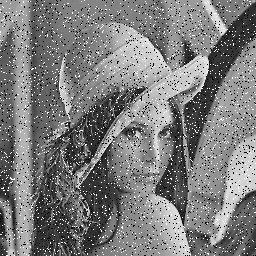

In [39]:
cv2_imshow(noise_img)

In [40]:
m, n = noise_img.shape  
img_new1 = np.zeros([m, n]) 
for i in range(1, m-1): 
    for j in range(1, n-1): 
        temp = [noise_img[i-1, j-1], 
               noise_img[i-1, j], 
               noise_img[i-1, j + 1], 
               noise_img[i, j-1], 
               noise_img[i, j], 
               noise_img[i, j + 1], 
               noise_img[i + 1, j-1], 
               noise_img[i + 1, j], 
               noise_img[i + 1, j + 1]] 
          
        temp = sorted(temp) 
        img_new1[i, j]= temp[4] 
  
img_new1 = img_new1.astype(np.uint8) 
cv2.imwrite('new_median_filtered.png', img_new1)

True

Applied Median Filter


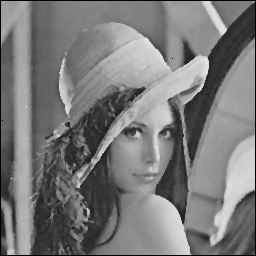

In [42]:
print('Applied Median Filter')
cv2_imshow(img_new1)

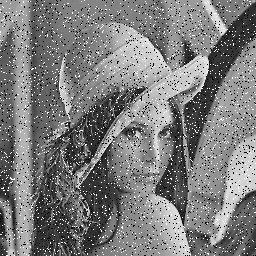

In [43]:
cv2_imshow(noise_img)

Applied Mean Filter


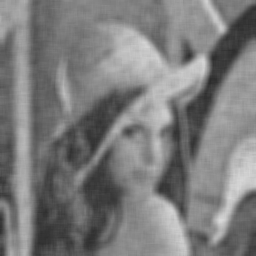

In [45]:
print('Applied Mean Filter')
cv2_imshow(cv2.blur(noise_img,(9,9)))